In [3]:
from math import pi
import pandas as pd
from pykalman import KalmanFilter
%matplotlib inline
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

__Открываем таблицу с данными__

In [4]:
df = pd.read_excel('TA9_sorted_light.xlsx')

In [5]:
df["TA09Th"].mean()

544.4903091198139

__Первое значение для фильтра__

In [6]:
df.columns

Index(['Time', 'TA09W', 'TA09Pin', 'TA09Pout', 'TA09Q', 'TA09Gh', 'TA09Gs',
       'TA09Gr', 'TA09Gsw', 'TA09Th', 'TA09Ts', 'TA09Tsw'],
      dtype='object')

In [7]:
col='TA09W'

__Инициализируем фильтр Калмана <br> Параметры стоят по умолчанию__

In [9]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices= [1],
                  initial_state_mean = df[col][0],
                  initial_state_covariance = 0.1,
                  observation_covariance=0.1,
                  transition_covariance=.01)

__Прогоняем столбец церез фильтр и выпрямляем его <br>
(по умолчанию kf.filter() возвращает array of tuple)__

In [10]:
state_means,_ = kf.filter(df[col])
state_means = state_means.flatten()

state_means

array([34.434     , 34.27875   , 34.179     , ..., 18.10092691,
       17.3461302 , 16.73932417])

__Выводим данные для сверки до/после__

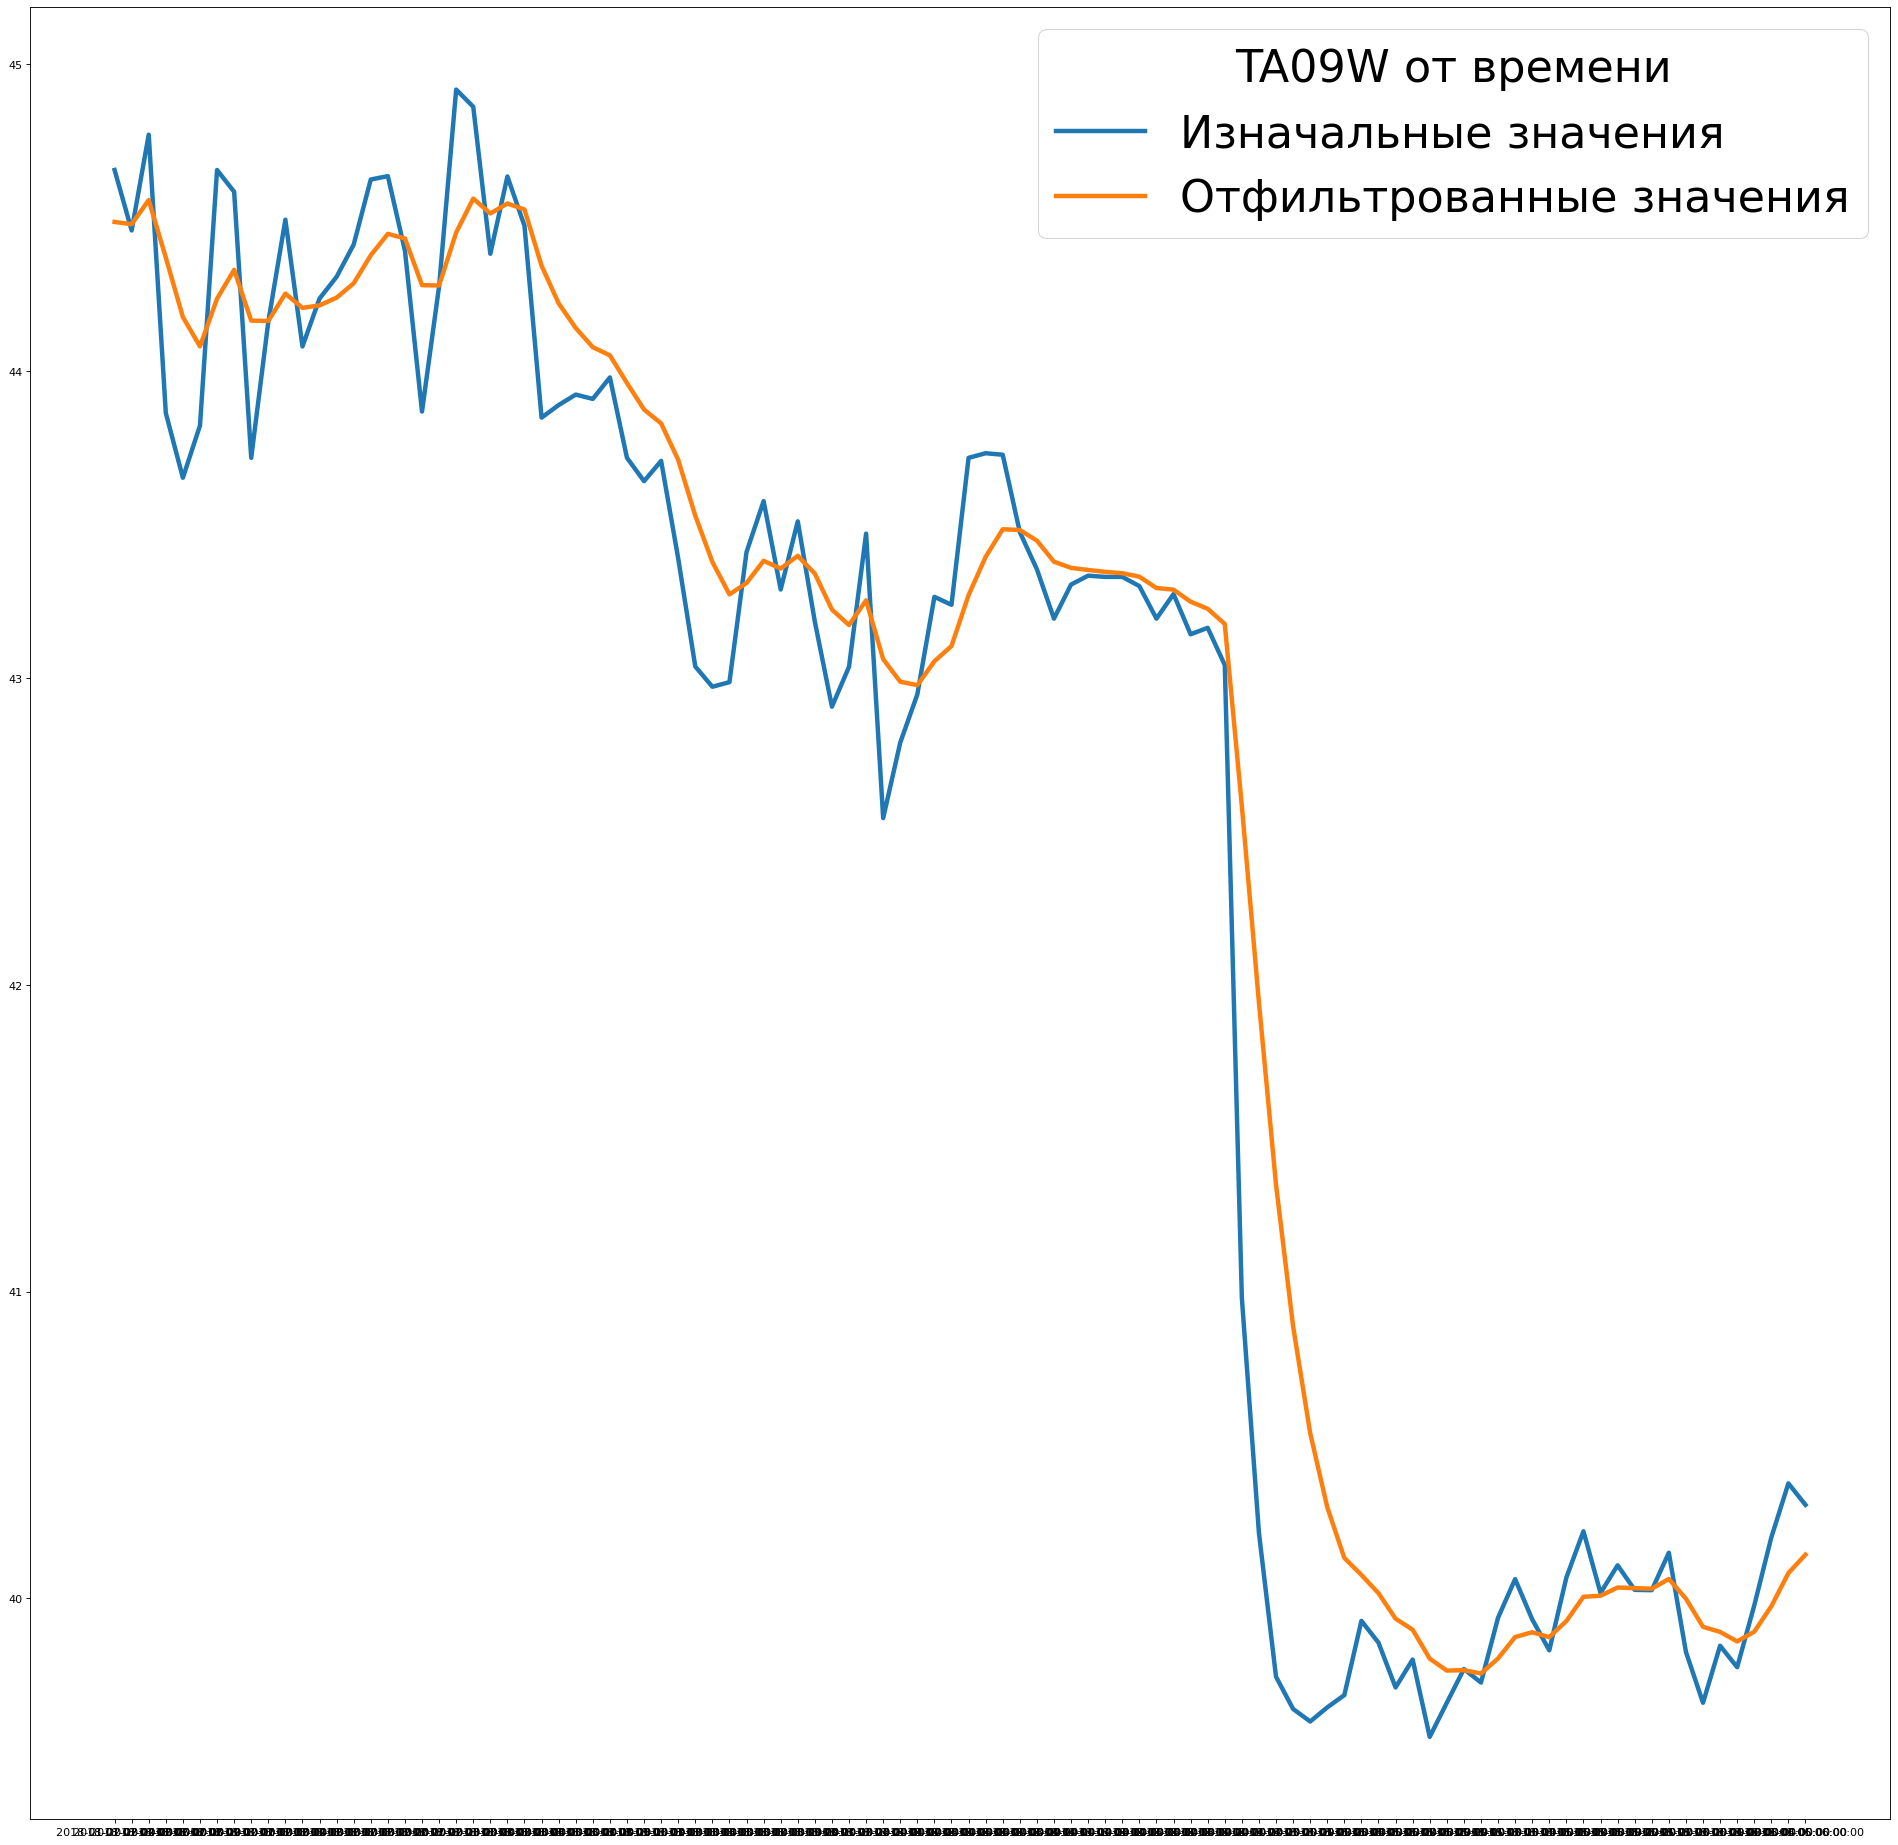

In [32]:
time = df['Time']
Gp2_values = df[col]

figure(num=None, figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')

plt.plot(time[50:150],Gp2_values[50:150],lw=4, label = 'Изначальные значения')
plt.plot(time[50:150],state_means[50:150],lw=4, label = 'Отфильтрованные значения')

plt.legend(fontsize=40,title="TA09W от времени",title_fontsize = '40')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc7afc26d68>]],
      dtype=object)

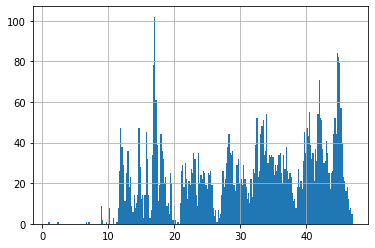

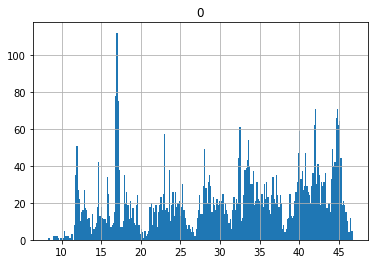

In [11]:
df[col].hist(bins=250)
#state_means.hist(bins=500)

pd.DataFrame(state_means).hist(bins=250)

